# Soil Erosion Prevalence and Tree Cover Loss
Surface area of land experiencing high soil erosion prevalence; surface area of tree cover loss. Both presented by country/territory.

Note that this is a parameterized widget; the specification passed to the API will not be renderable without the geostore identifier being inserted.

**Note: widget incomplete - suspended from Ocean Watch minimum viable product**

_Author: Peter Kerins_  
_Created: 28 Jul 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Ocean Watch country page - parameterized chart
- Time series
- Hybrid chart: line, bar, area

## Data
Surface areas calculated on Google Earth Engine ([high soil erosion prevalence](https://code.earthengine.google.com/78c04b071939eeddfcdc40f3dae2153c), [tree cover loss](https://code.earthengine.google.com/9d7e32d1409dfee9d1d0f81f30688cdb)); outputs combined and restructured via Python scripts ([high soil erosion prevalence](../analysis/high-soil-erosion-structuring.py), [tree cover loss](../analysis/tree-cover-loss-structuring.py)).  
Carto: [ow_widget_territory](https://resourcewatch.carto.com/u/wri-rw/dataset/ow_widget_territory) (master table for all country widgets on Ocean Watch)    

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Widget

## Demo Queries
`gid_0 ILIKE <iso3>` used as stand-in for parameterized `geostore_id={{geostore_id}}` in production version  

Three queries for three separate time series  

### Yearly Loss
```sql
SELECT gid_0, name_0, variable, date, value 
FROM ow_widget_territory
WHERE widget ILIKE 'soil erosion and forest loss'
AND gid_0 ILIKE 'BRA'
AND variable ILIKE 'year_loss'
ORDER BY gid_0 ASC, date ASC
```

### Cumulative Loss
```sql
SELECT gid_0, name_0, variable, date, value 
FROM ow_widget_territory
WHERE widget ILIKE 'soil erosion and forest loss'
AND gid_0 ILIKE 'BRA'
AND variable ILIKE 'cumulative_loss'
ORDER BY gid_0 ASC, date ASC
```

### High Soil Erosion Prevalence
```sql
SELECT gid_0, name_0, variable, date, value 
FROM ow_widget_territory
WHERE widget ILIKE 'soil erosion and forest loss'
AND gid_0 ILIKE 'BRA'
AND variable ILIKE 'highsep'
ORDER BY gid_0 ASC, date ASC
```

## Parameterized Query
```sql
SELECT territory.gid_0, territory.name_0, territory.variable, territory.date, territory.value 
FROM ow_widget_territory territory
LEFT OUTER JOIN gadm36_0 gadm ON territory.gid_0 = gadm.gid_0
WHERE territory.widget ILIKE 'land cover change: urbanization'
AND gadm.geostore_prod ILIKE '{{geostore_id}}'
ORDER BY territory.gid_0 ASC, territory.date ASC, territory.variable DESC
```

## Demo Specification
_Code in RW style, not vanilla Vega_
- [Select Territory](https://api.resourcewatch.org/v1/widget/fd292bc0-be35-4fc9-8dc1-8485ea0360b8?env=production) `fd292bc0-be35-4fc9-8dc1-8485ea0360b8`  

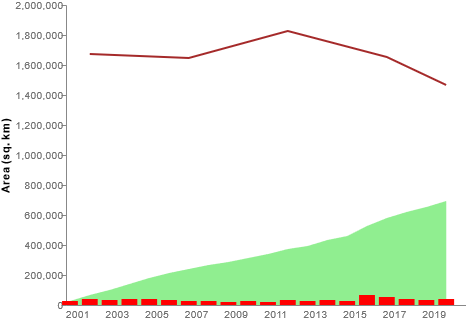

In [4]:
spec=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "year_loss",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, name_0, variable, date, value FROM ow_widget_territory WHERE widget ILIKE 'soil erosion and forest loss' AND gid_0 ILIKE 'BRA' AND variable ILIKE 'year_loss' ORDER BY gid_0 ASC, date ASC",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {
          "date": "number"
        }
      },

      "transform": [
      ]
    },
    {
      "name": "cum_loss",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, name_0, variable, date, value FROM ow_widget_territory WHERE widget ILIKE 'soil erosion and forest loss' AND gid_0 ILIKE 'BRA' AND variable ILIKE 'cumulative_loss' ORDER BY gid_0 ASC, date ASC",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {
          "date": "number"
        }
      },
      "transform": [
      ]
    },
    {
      "name": "sep",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, name_0, variable, date, value FROM ow_widget_territory WHERE widget ILIKE 'soil erosion and forest loss' AND gid_0 ILIKE 'BRA' AND variable ILIKE 'highsep' ORDER BY gid_0 ASC, date ASC",
      "format": {
        "type": "json", 
        "property": "rows",
        "parse": {
          "date": "number"
        }
      },
      "transform": [
      ]
    }
  ],
  "scales": [
    {
      "name": "xband",
      "type": "band",
      "domain": {"data": "year_loss", "field": "date"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "xline",
      "type": "linear",
      "domain": {"data": "year_loss", "field": "date"},
      "range": "width"
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "sep", "field": "value"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Area (sq. km)",
      "encode": {
        "labels": {
          "interactive": true,
          "enter": {
          },
          "update": {
            "align": {"value": "right"},
            "baseline": {"value": "middle"},
            "dx": {"value": 4},
            "fill": {"value": "#717171"}
          },
          "hover": {"fill": {"value": "firebrick"}}
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xband",
      "tickSize": 0,
      "labelPadding": 4,
      "labelOverlap": true,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "enter": {
          },
          "update": {
            "fill": {"value": "#717171"}
          },
          "hover": {
            "fill": {
              "value": "black"
            }
          }
        }
      }
    }
  ],
  "marks": [
    {
      "name": "area_cum",
      "from": {"data": "cum_loss"},
      "type": "area",
      "encode": {
        "enter": {
          "x": {"scale": "xband", "field": "date"},
          "width": {"scale": "xband", "band": 1},
          "y": {"scale": "yscale", "value": 0},
          "y2": {"scale": "yscale", "field": "value"},
          "fill": {"value": "green"}
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_year",
      "from": {"data": "year_loss"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xband", "field": "date"},
          "width": {"scale": "xband", "band": 1},
          "y": {"scale": "yscale", "value": 0},
          "y2": {"scale": "yscale", "field": "value"},
          "fill": {"value": "#E70000"}
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "line_sep",
      "from": {"data": "sep"},
      "type": "line",
      "encode": {
        "enter": {
          "x": {"scale": "xband", "field": "date"},
          "y": {"scale": "yscale", "field": "value"},
          "stroke": {"value": "brown"}
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    }
  ],
  "legends": [
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "value",
            "property": "Area (sq. km)",
            "type": "number",
            "format": ",.1f"
          }
        ]
      }
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

# RW API
Parent dataset [soc.104.rw0 Global Land Cover](https://resourcewatch.org/data/explore/Global-Land-Cover-UN-FAO-LCCS-Classification) ([Admin](https://resourcewatch.org/admin/data/datasets/b2f00f99-46ed-43e6-a7a1-a5809d9369d4/edit))    
[API ID](https://api.resourcewatch.org/v1/dataset/b2f00f99-46ed-43e6-a7a1-a5809d9369d4/) `b2f00f99-46ed-43e6-a7a1-a5809d9369d4`  
[Widgets](https://api.resourcewatch.org/v1/dataset/b2f00f99-46ed-43e6-a7a1-a5809d9369d4/widget)

Widgets created via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer).  